# Analysis & Testing
Client & Author's Orders + Hypothesis Testing

In [33]:
import required_dataframes as rd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

## 1. Client Oder #1
### “Top Five Romance Authors”

In [34]:
df1 = rd.request_one()
df1.head()

/Users/kvmmn/Desktop/data_summit/quda/quda_projects/Book-Store/kaveh_analysis/required_dataframes.py:68: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,name,num_of_romance_books,avg_grade,num_of_awards_tags,num_of_list_tags,description
0,شارلوت برونته,529,3.5614,NaN,2624.0,شارلوت برونته، زاده ی ۲۱ آوریل ۱۸۱۶ و درگذشته ...
1,اف اسکات فیتزجرالد,112,4.0000,NaN,472.0,None
2,آندره ژید,24,3.6667,24.0,6.0,پل گیوم آندره ژید، زاده ی ۱۸۶۹ و درگذشته ی ۱۹۵...
3,هاروکی موراکامی,15,4.0000,9.0,22.0,هاروکی موراکامی در ۱۲ ژانویه ۱۹۴۹ در کیوتو ژاپ...
4,جوجو مویز,12,4.0000,NaN,NaN,None


In [35]:
# Handle missing values: Null -> 0

df1 = df1.fillna(0)

df1.isnull().sum()

name                    0
num_of_romance_books    0
avg_grade               0
num_of_awards_tags      0
num_of_list_tags        0
description             0
dtype: int64

In [36]:
# Normalize numerical values to the range (1, 2)

cols_to_scale = [
    "num_of_romance_books",
    "avg_grade",
    "num_of_awards_tags",
    "num_of_list_tags",
]
min_max_scaler = MinMaxScaler(feature_range=(1, 2))
df1[cols_to_scale] = min_max_scaler.fit_transform(df1[cols_to_scale])

df1.head()

,name,num_of_romance_books,avg_grade,num_of_awards_tags,num_of_list_tags,description
0,شارلوت برونته,2.000000,1.5614,1.000,2.000000,شارلوت برونته، زاده ی ۲۱ آوریل ۱۸۱۶ و درگذشته ...
1,اف اسکات فیتزجرالد,1.210227,2.0000,1.000,1.179878,0
2,آندره ژید,1.043561,1.6667,2.000,1.002287,پل گیوم آندره ژید، زاده ی ۱۸۶۹ و درگذشته ی ۱۹۵...
3,هاروکی موراکامی,1.026515,2.0000,1.375,1.008384,هاروکی موراکامی در ۱۲ ژانویه ۱۹۴۹ در کیوتو ژاپ...
4,جوجو مویز,1.020833,2.0000,1.000,1.000000,0


### Metric for client order 1
metric_1 = f1 × f2<sup>2</sup> × f3<sup>3</sup> × f4 <br><br>
f1 = Author's Romance Books Count <br>
f2 = Average Rating of Author's Romance Books <br>
f3 = Number of Awards For Author's Romance Books <br>
f4 = Number of Listings For Author's Romance Books

In [37]:
# Compute the final metric for each author
# Approach:
#   Very strong Rating effect
#   Strong number of books effect

df1["metric_1"] = round(
    df1["num_of_romance_books"] ** 2
    * df1["avg_grade"] ** 3
    * df1["num_of_awards_tags"]
    * df1["num_of_list_tags"],
    2,
)

top_writers = df1[["name", "metric_1"]].sort_values(by="metric_1", ascending=False).head(5)

print(f"Top 5 writers are: ")
display(top_writers)

Top 5 writers are: 


,name,metric_1
0,شارلوت برونته,30.45
1,اف اسکات فیتزجرالد,13.82
3,هاروکی موراکامی,11.69
2,آندره ژید,10.11
4,جوجو مویز,8.34


------------------------------------------------

## 2. Client Oder #2
### “Books With Best Quality & Price”

In [38]:
df2 = rd.request_two()
df2

/Users/kvmmn/Desktop/data_summit/quda/quda_projects/Book-Store/kaveh_analysis/required_dataframes.py:96: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,code,title_persian,title_english,price,release_year_mi,release_year_sh,grade,page_count,cover,num_of_award_tags,num_of_list_tags
0,115704,خداحافظ گل سوری,Selected poems,73000,NaN,1397.0,4,183.0,شومیز,NaN,NaN
1,32523,الفاظ و اشیا,The Order of Things,440000,1966.0,1402.0,4,512.0,شومیز,NaN,NaN
2,94001,گریه کن سرزمین محبوب من,Cry my beloved land,80000,NaN,1401.0,4,174.0,شومیز,NaN,NaN
3,64403,کارگاه ها,Atelieres,240000,1996.0,1400.0,4,603.0,جلدسخت,NaN,NaN
4,73920,چگونه ایمیل های موثر تهیه کنیم,Writing Effective E-Mail,49900,1998.0,1388.0,3,183.0,شومیز,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3588,60983,مبانی روان شناسی ورزش و تمرین 1,Foundations of sport and exercise psychology,279000,2011.0,1401.0,3,436.0,شومیز,NaN,1.0
3589,96799,مبانی روان شناسی ورزش و تمرین 2,Foundations of sport and exercise psychology,299000,1995.0,1401.0,3,472.0,شومیز,NaN,1.0
3590,71279,روش خوردن هوشمندانه,Bright Line Eating,119000,2017.0,1399.0,4,312.0,شومیز,NaN,NaN
3591,60442,60 نکته آشپزی,Cooking,1000,NaN,1387.0,3,31.0,شومیز,NaN,NaN


In [39]:
# Handle missing values

# Null -> 0 :: (Hard = 1, Soft = 0)
df2["cover"] = df2["cover"].fillna("نرم")

# Null -> Mean of the page counts
df2["page_count"] = df2["page_count"].fillna(df2["page_count"].mean())

# Null -> Median of the release years shamsi
df2["release_year_sh"] = df2["release_year_sh"].fillna(
    df2["release_year_sh"].median()
)

# Null -> 0
df2['num_of_award_tags'] = df2['num_of_award_tags'].fillna(0)

# Null -> 0
df2['num_of_list_tags'] = df2['num_of_list_tags'].fillna(0)

df2.isnull().sum()

code                    0
title_persian           0
title_english          30
price                   0
release_year_mi      1642
release_year_sh         0
grade                   0
page_count              0
cover                   0
num_of_award_tags       0
num_of_list_tags        0
dtype: int64

In [40]:
# Assign cover type: f2
# Hard = 1 / covers including text "سخت" or "زرکوب" or "چرم"
# Soft = 0 / covers including text "نرم" or "سلفونی" or "شومیز"

def cover_type(cover):
    if "سخت" in cover or "زرکوب" in cover or "چرم" in cover:
        return 1
    else:
        return 0

df2["cover"] = df2["cover"].apply(cover_type)

df2["cover"].value_counts()

cover
0    3251
1     342
Name: count, dtype: int64

In [41]:
# Assign page count type: f3
# Short = 1, Medium = 3, Long = 5

page_bins = [
    0,
    df2["page_count"].quantile(0.25),
    df2["page_count"].quantile(0.75),
    df2["page_count"].max() + 1,
]
page_labels = [1, 3, 5]
df2["page_count"] = pd.cut(
    df2["page_count"], bins=page_bins, labels=page_labels, include_lowest=True
)

df2["page_count"] = df2["page_count"].astype(float)
df2["page_count"].value_counts()

page_count
3.0    1788
1.0     908
5.0     897
Name: count, dtype: int64

In [42]:
# Assign publish shamsi year type: F4
# Classic = 1, Old = 3, Modern = 5

year_bins = [
    0,
    df2["release_year_sh"].quantile(0.33),
    df2["release_year_sh"].quantile(0.66),
    df2["release_year_sh"].max() + 1,
]
year_labels = [1, 3, 5]
df2["release_year_sh"] = pd.cut(
    df2["release_year_sh"], bins=year_bins, labels=year_labels, include_lowest=True
)

df2["release_year_sh"] = df2["release_year_sh"].astype(float)

df2["release_year_sh"].value_counts()

release_year_sh
3.0    1317
1.0    1257
5.0    1019
Name: count, dtype: int64

In [43]:
# Normalize numerical values to the range (1, 2)

cols_to_scale_2 = [
    "grade",
    "cover",
    'page_count',
    'release_year_sh',
    "num_of_award_tags",
    "num_of_list_tags",
]
standard_scaler = StandardScaler()
df2[cols_to_scale_2] = standard_scaler.fit_transform(df2[cols_to_scale_2])

df2.head()

,code,title_persian,title_english,price,release_year_mi,release_year_sh,grade,page_count,cover,num_of_award_tags,num_of_list_tags
0,115704,خداحافظ گل سوری,Selected poems,73000,NaN,-1.177300,0.942612,0.004319,-0.324343,-0.123827,-0.12431
1,32523,الفاظ و اشیا,The Order of Things,440000,1966.0,1.344333,0.942612,1.415212,-0.324343,-0.123827,-0.12431
2,94001,گریه کن سرزمین محبوب من,Cry my beloved land,80000,NaN,1.344333,0.942612,0.004319,-0.324343,-0.123827,-0.12431
3,64403,کارگاه ها,Atelieres,240000,1996.0,0.083516,0.942612,1.415212,3.083156,-0.123827,-0.12431
4,73920,چگونه ایمیل های موثر تهیه کنیم,Writing Effective E-Mail,49900,1998.0,-1.177300,-1.028753,0.004319,-0.324343,1.011148,-0.12431


### Metric for client order 2
metric_2 = w1×f1 + w2×f2 + w3×f3 + w4×f4 + w5×f5 + w6×f6

f1 = Rating  <br>
f2 = Cover Type (Soft or Hard) <br>
f3 = Pages Count <br>
f4 = Shamsi Year of Publishin <br>
f5 = Number of Awards <br>
f6 = Number of Listings

In [44]:
# Weights for each feature

w1 = 40
w2 = 5
w3 = 5
w4 = 5
w5 = 23
w6 = 22

In [45]:
# Compute the final metric for each book

df2["metric_2"] = (
    w1 * df2["grade"]
    + w2 * df2["cover"]
    + w3 * df2["page_count"]
    + w4 * df2["release_year_sh"]
    + w5 * df2["num_of_award_tags"]
    + w6 * df2["num_of_list_tags"]
)

df2.head()

,code,title_persian,title_english,price,release_year_mi,release_year_sh,grade,page_count,cover,num_of_award_tags,num_of_list_tags,metric_2
0,115704,خداحافظ گل سوری,Selected poems,73000,NaN,-1.177300,0.942612,0.004319,-0.324343,-0.123827,-0.12431,24.635008
1,32523,الفاظ و اشیا,The Order of Things,440000,1966.0,1.344333,0.942612,1.415212,-0.324343,-0.123827,-0.12431,44.297636
2,94001,گریه کن سرزمین محبوب من,Cry my beloved land,80000,NaN,1.344333,0.942612,0.004319,-0.324343,-0.123827,-0.12431,37.243171
3,64403,کارگاه ها,Atelieres,240000,1996.0,0.083516,0.942612,1.415212,3.083156,-0.123827,-0.12431,55.031047
4,73920,چگونه ایمیل های موثر تهیه کنیم,Writing Effective E-Mail,49900,1998.0,-1.177300,-1.028753,0.004319,-0.324343,1.011148,-0.12431,-28.115152


In [46]:
# Filter books based on the criteria:
# top quality (based on the final metric) and bottom 20% prices

threshold_price = df2["price"].quantile(0.2)
threshold_metric = df2["metric_2"].quantile(0.75)

recommended_books = df2[
    (df2["price"] <= threshold_price) & (df2["metric_2"] >= threshold_metric)
]

print(f"Best recommended books are: ")
display(recommended_books)

Best recommended books are: 


,code,title_persian,title_english,price,release_year_mi,release_year_sh,grade,page_count,cover,num_of_award_tags,num_of_list_tags,metric_2
25,19359,سوتیکده ی سعادت، پرشین فامیلز، دات کام,Soutikadeh,22000,NaN,0.083516,0.942612,0.004319,-0.324343,-0.123827,-0.124310,30.939089
60,25558,ساعت 25/اشخاص,Saat,15000,NaN,0.083516,0.942612,0.004319,-0.324343,-0.123827,-0.124310,30.939089
124,3511,پیراهن ابریشمی سبز رنگ,Collected Short Stories,5000,2007.0,-1.177300,0.942612,-1.406573,-0.324343,1.011148,-0.124310,43.684966
180,20520,نفرتی که می کاری,The Hate U Give,24000,2017.0,0.083516,0.942612,0.004319,-0.324343,13.495872,0.933558,367.465272
187,8967,اورازان,Orazan,10000,1978.0,0.083516,0.942612,0.004319,-0.324343,-0.123827,-0.124310,30.939089
...,...,...,...,...,...,...,...,...,...,...,...,...
3370,47010,مقدمه ای بر مطالعات علم و تکنولوژی,An Introduction to Science and Technology Stu...,17000,2003.0,-1.177300,0.942612,1.415212,-0.324343,-0.123827,-0.124310,31.689472
3394,94952,مکانیک کوانتومی _ جلد 1,Introductory Quantum Mechanics,25000,1980.0,-1.177300,0.942612,1.415212,-0.324343,-0.123827,-0.124310,31.689472
3406,51733,راهنمای سیستم تجارت جهانی,Business Guide to the World Trading System,9500,1999.0,-1.177300,0.942612,1.415212,3.083156,-0.123827,-0.124310,48.726965
3436,41256,سرچشمه های آفتاب,Sar cheshmeh-haye Aftab,15000,NaN,-1.177300,0.942612,1.415212,-0.324343,-0.123827,-0.124310,31.689472


------------------------------------------------

## 3. Author's Order
### “Top Five Historical Book Publishers”

In [47]:
df3 = rd.request_three()
df3.head()

/Users/kvmmn/Desktop/data_summit/quda/quda_projects/Book-Store/kaveh_analysis/required_dataframes.py:147: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,name,num_of_historic_books,avg_grade,num_of_award_tags,num_of_list_tags
0,افق,187,3.5936,NaN,589.0
1,علم,56,3.3393,NaN,1.0
2,امیرکبیر,54,3.5556,NaN,242.0
3,محراب قلم,53,3.3774,NaN,269.0
4,نشر کتاب پارسه,48,3.0625,NaN,242.0


In [48]:
# Handle missing values: Null -> 0

df3 = df3.fillna(0)

df3.isnull().sum()

name                     0
num_of_historic_books    0
avg_grade                0
num_of_award_tags        0
num_of_list_tags         0
dtype: int64

In [49]:
# Normalize numerical values to the range (1, 2)

cols_to_scale_3 = [
    "num_of_historic_books",
    "avg_grade",
    "num_of_award_tags",
    "num_of_list_tags",
]
min_max_scaler = MinMaxScaler(feature_range=(1, 2))
df3[cols_to_scale] = min_max_scaler.fit_transform(df3[cols_to_scale_3])

df3.head()

,name,num_of_historic_books,avg_grade,num_of_award_tags,num_of_list_tags,num_of_romance_books,num_of_awards_tags
0,افق,187,1.29680,0.0,2.000000,2.000000,1.0
1,علم,56,1.16965,0.0,1.001698,1.295699,1.0
2,امیرکبیر,54,1.27780,0.0,1.410866,1.284946,1.0
3,محراب قلم,53,1.18870,0.0,1.456706,1.279570,1.0
4,نشر کتاب پارسه,48,1.03125,0.0,1.410866,1.252688,1.0


### Metric for Author's order
metric_3 = f1 × f2<sup>2</sup> × f3<sup>3</sup> × f4 <br><br>
f1 = Number of Historical Books By Publisher <br>
f2 = Average Rating of Publisher's Historical Books <br>
f3 = Number of Awards For Publisher's Historical Books <br>
f4 = Number of Listings For Publisher's Historical Books

In [50]:
# Compute the final metric for each publisher
# Approach:
#   Very strong Rating effect
#   Strong number of books effect

df3["metric_3"] = round(
    df3["num_of_historic_books"] ** 2
    * df3["avg_grade"] ** 3
    * df3["num_of_award_tags"]
    * df3["num_of_list_tags"],
    2,
)

top_publishers = df3[["name", "metric_3"]].sort_values(by="metric_3", ascending=False).head(5)

print(f"Top 5 publishers are: ")
display(top_publishers)

Top 5 publishers are: 


,name,metric_3
7,نگاه,7137.93
9,دنیای نو,5575.02
5,دبیر,5386.43
48,پرتقال,55.02
83,مشکی,8.00


------------------------------------------------

## 4. Hypothesis #1
### “Translation has a significant impact on the book’s price.”

In [51]:
df_translated, df_not_translated = rd.hypothesis_one()

df_translated.head(), df_not_translated.head()

/Users/kvmmn/Desktop/data_summit/quda/quda_projects/Book-Store/kaveh_analysis/required_dataframes.py:162: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  not_translated_df = pd.read_sql(query, conn)
/Users/kvmmn/Desktop/data_summit/quda/quda_projects/Book-Store/kaveh_analysis/required_dataframes.py:174: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  translated_df = pd.read_sql(query, conn)


(     code     price
 0   46582  10000000
 1   92256   3750000
 2   34715   3000000
 3  109701   2400000
 4   56132   2000000,
     code    price
 0  20194  2200000
 1  23932  1090000
 2  84216   980000
 3  33126   970000
 4  29508   950000)

In [52]:
# Remove outliers: top 5% of prices
# In order to have a better comparison between the two distributions

threshold_tr = df_translated["price"].quantile(0.95)
threshold_not_tr = df_not_translated["price"].quantile(0.95)

df_translated = df_translated[df_translated["price"] <= threshold_tr]
df_not_translated = df_not_translated[df_not_translated["price"] <= threshold_not_tr]

In [53]:
# Calculate mean and variance for both groups

mean_translated = df_translated["price"].mean()
variance_translated = df_translated["price"].var()

mean_non_translated = df_not_translated["price"].mean()
variance_non_translated = df_not_translated["price"].var()

print(f"Translated books:")
print(f"\tMean of translated books: {mean_translated:,.1}")
print(f"\tVariance of translated books: {variance_translated:,.1}")
print(f"\nNon-translated books:")
print(f"\tMean of non-translated books: {mean_non_translated:,.1}")
print(f"\tVariance of non-translated books: {variance_non_translated:,.1}")

Translated books:
	Mean of translated books: 1e+05
	Variance of translated books: 6e+09

Non-translated books:
	Mean of non-translated books: 8e+04
	Variance of non-translated books: 5e+09


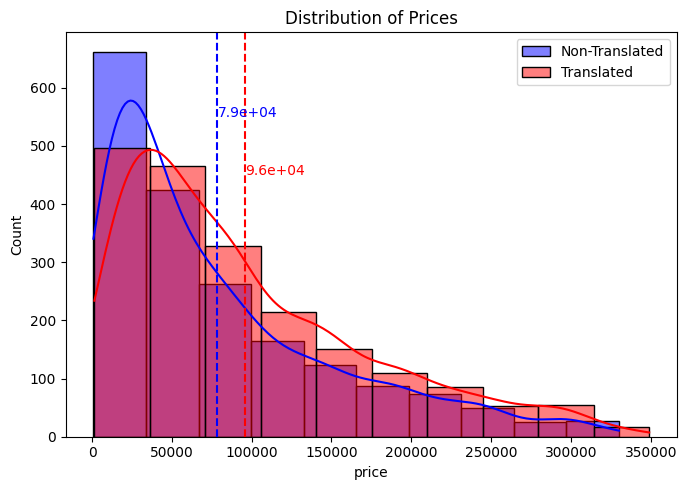

In [54]:
# Distribution histogram plot with mean annotations
plt.figure(figsize=(7, 5))
sns.histplot(
    df_not_translated["price"],
    color="blue",
    label="Non-Translated",
    kde=True,
    bins=10,
)
sns.histplot(
    df_translated["price"],
    color="red",
    label="Translated",
    kde=True,
    bins=10,
)

plt.axvline(mean_non_translated, color="blue", linestyle="--")
plt.text(
    mean_non_translated, 550, f"{mean_non_translated:,.2}", rotation=0, color="blue"
)

plt.axvline(mean_translated, color="red", linestyle="--")
plt.text(mean_translated, 450, f"{mean_translated:,.2}", rotation=0, color="red")

plt.title("Distribution of Prices")
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
# Measure skewness for both groups
skewness_non_translated = df_not_translated["price"].skew()
skewness_translated = df_translated["price"].skew()

print(f"Skewness for translated books: {skewness_translated:,.2f}")
print(f"Skewness for non-translated books: {skewness_non_translated:,.2f}")

Skewness for translated books: 1.06
Skewness for non-translated books: 1.29


Both are right-skewed.

In [57]:
# Apply logarithm transformation for both groups
df_translated["price_log_transformed"] = np.log(df_translated["price"])
df_not_translated["price_log_transformed"] = np.log(df_not_translated["price"])

skewness_non_translated = df_not_translated["price_log_transformed"].skew()
skewness_translated = df_translated["price_log_transformed"].skew()

print(
    f"Skewness for translated books after log transform: {skewness_translated:,.2f}"
)
print(
    f"Skewness for non-translated books after log transform: {skewness_non_translated:,.2f}"
)

Skewness for translated books after log transform: -0.72
Skewness for non-translated books after log transform: -0.50


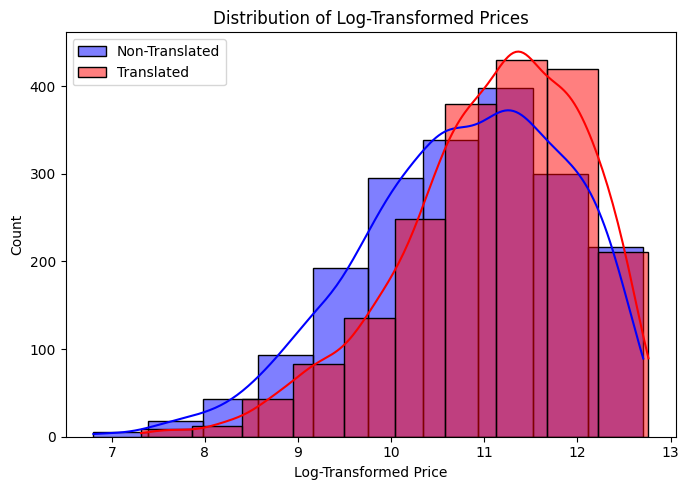

In [58]:
# Plot histogram for log-transformed prices
plt.figure(figsize=(7, 5))
sns.histplot(
    df_not_translated["price_log_transformed"],
    color="blue",
    label="Non-Translated",
    kde=True,
    bins=10,
)
sns.histplot(
    df_translated["price_log_transformed"],
    color="red",
    label="Translated",
    kde=True,
    bins=10,
)

plt.title("Distribution of Log-Transformed Prices")
plt.xlabel("Log-Transformed Price")
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
# Perform independent two-sample t-test
non_translated_prices = df_not_translated["price_log_transformed"]
translated_prices = df_translated["price_log_transformed"]

t_stat, p_value = ttest_ind(non_translated_prices, translated_prices, equal_var=True)

print(f"T-statistic: {t_stat:,.5f}")
print(f"P-value: {p_value:,.5f}")

T-statistic: -9.22456
P-value: 0.00000


A  p-value of **0.000** indicates that the observed data is extremely inconsistent with the null hypothesis. <br>
This leads to the **REJECTION** of the null hypothesis in favor of the alternative hypothesis.

------------------------------------------------

## 5. Hypothesis #2
### “There is a significant difference in prices between 'Hard' and ‘Shomiz’ book covers.”

In [60]:
df_hard, df_shomiz = rd.hypothesis_two()

df_hard.head(), df_shomiz.head()

/Users/kvmmn/Desktop/data_summit/quda/quda_projects/Book-Store/kaveh_analysis/required_dataframes.py:187: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hard_cover_df = pd.read_sql(query, conn)
/Users/kvmmn/Desktop/data_summit/quda/quda_projects/Book-Store/kaveh_analysis/required_dataframes.py:195: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  shomiz_cover_df = pd.read_sql(query, conn)


(     code    price   cover
 0  109701  2400000  جلدسخت
 1     812  1450000  جلدسخت
 2  113018  1200000  جلدسخت
 3   50294  1145000  جلدسخت
 4   23932  1090000  جلدسخت,
      code    price  cover
 0   93520  1100000  شومیز
 1   97187   950000  شومیز
 2  113791   915000  شومیز
 3   93963   850000  شومیز
 4    6008   835000  شومیز)

In [61]:
# Remove outliers: top 5% of prices
# In order to have a better comparison between the two distributions

threshold_hard = df_hard["price"].quantile(0.95)
threshold_not_shomiz = df_shomiz["price"].quantile(0.95)

df_hard = df_hard[df_hard["price"] <= threshold_hard]
df_shomiz = df_shomiz[df_shomiz["price"] <= threshold_not_shomiz]

In [62]:
# Calculate mean and variance for both groups

mean_hard = df_hard["price"].mean()
variance_hard = df_hard["price"].var()

mean_shomiz = df_shomiz["price"].mean()
variance_shomiz = df_shomiz["price"].var()

print(f"Hard cover books:")
print(f"\tMean of hard cover: {mean_hard:,.1}")
print(f"\tVariance of hard cover: {variance_hard:,.1}")
print(f"\nShomiz cover books:")
print(f"\tMean of shomiz cover: {mean_shomiz:,.1}")
print(f"\tVariance of shomiz_cover: {variance_shomiz:,.1}")

Hard cover books:
	Mean of hard cover: 2e+05
	Variance of hard cover: 3e+10

Shomiz cover books:
	Mean of shomiz cover: 8e+04
	Variance of shomiz_cover: 4e+09


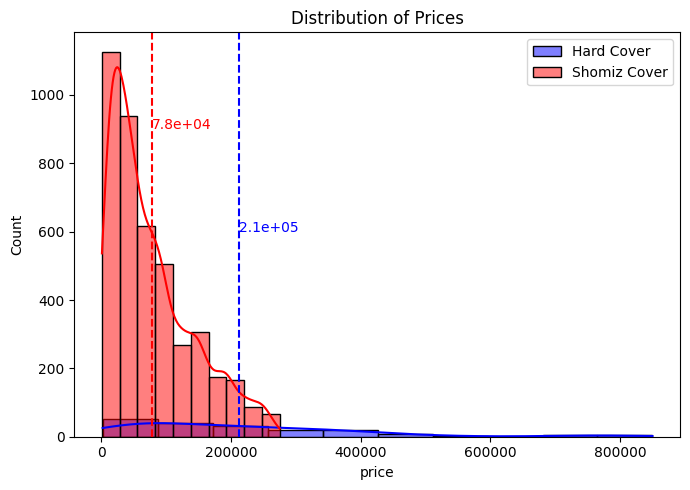

In [65]:
# Distribution histogram plot with mean annotations
plt.figure(figsize=(7, 5))
sns.histplot(
    df_hard["price"],
    color="blue",
    label="Hard Cover",
    kde=True,
    bins=10,
)
sns.histplot(
    df_shomiz["price"],
    color="red",
    label="Shomiz Cover",
    kde=True,
    bins=10,
)

plt.axvline(mean_hard, color="blue", linestyle="--")
plt.text(
    mean_hard, 600, f"{mean_hard:,.2}", rotation=0, color="blue"
)

plt.axvline(mean_shomiz, color="red", linestyle="--")
plt.text(mean_shomiz, 900, f"{mean_shomiz:,.2}", rotation=0, color="red")

plt.title("Distribution of Prices")
plt.legend()
plt.tight_layout()
plt.show()

In [67]:
# Measure skewness for both groups
skewness_hard = df_hard["price"].skew()
skewness_shomiz = df_shomiz["price"].skew()

print(f"Skewness for hard cover books: {skewness_hard:,.2f}")
print(f"Skewness for shomiz cover books: {skewness_shomiz:,.2f}")

Skewness for hard cover books: 1.40
Skewness for shomiz cover books: 1.01


Both are right-skewed.

In [68]:
# Apply logarithm transformation for both groups

df_hard["price_log_transformed"] = np.log(df_hard["price"])
df_shomiz["price_log_transformed"] = np.log(df_shomiz["price"])

skewness_hard = df_hard["price_log_transformed"].skew()
skewness_shomiz = df_shomiz["price_log_transformed"].skew()

print(
    f"Skewness for hard cover books after log transform: {skewness_hard:,.2f}"
)
print(
    f"Skewness for non-shomiz cover books after log transform: {skewness_shomiz:,.2f}"
)

Skewness for hard cover books after log transform: -1.08
Skewness for non-shomiz cover books after log transform: -0.67


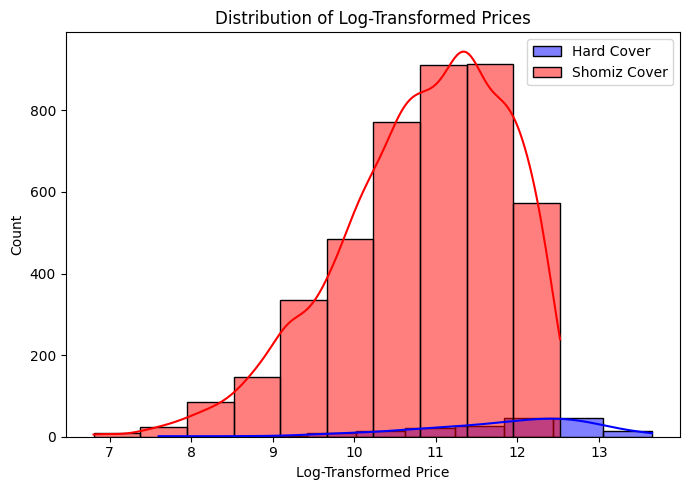

In [69]:
# Plot histogram for log-transformed prices
plt.figure(figsize=(7, 5))
sns.histplot(
    df_hard["price_log_transformed"],
    color="blue",
    label="Hard Cover",
    kde=True,
    bins=10,
)
sns.histplot(
    df_shomiz["price_log_transformed"],
    color="red",
    label="Shomiz Cover",
    kde=True,
    bins=10,
)

plt.title("Distribution of Log-Transformed Prices")
plt.xlabel("Log-Transformed Price")
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
# Perform independent two-sample t-test
hard_prices = df_hard["price_log_transformed"]
shomiz_prices = df_shomiz["price_log_transformed"]

t_stat, p_value = ttest_ind(hard_prices, shomiz_prices, equal_var=True)

print(f"T-statistic: {t_stat:,.5f}")
print(f"P-value: {p_value:,.5f}")

T-statistic: 12.47710
P-value: 0.00000


A  p-value of **0.000** indicates that the observed data is extremely inconsistent with the null hypothesis. <br>
This leads to the **REJECTION** of the null hypothesis in favor of the alternative hypothesis.